In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("italy.csv")
data

,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,away_country,home_code,away_code,home_continent,away_continent,continent,level
0,Juventus,Ssc Napoli,1929-10-06,3,2,F,italy,Juventus (Italy),Ssc Napoli (Italy),italy,italy,IT,IT,Europe,Europe,Europe,national
1,Lazio Roma,Bologna FC,1929-10-06,3,0,F,italy,Lazio Roma (Italy),Bologna FC (Italy),italy,italy,IT,IT,Europe,Europe,Europe,national
2,As Livorno,Inter,1929-10-06,1,2,F,italy,As Livorno (Italy),Inter (Italy),italy,italy,IT,IT,Europe,Europe,Europe,national
3,AC Milan,Brescia Calcio,1929-10-06,4,1,F,italy,AC Milan (Italy),Brescia Calcio (Italy),italy,italy,IT,IT,Europe,Europe,Europe,national
4,Calcio Padova,Modena FC,1929-10-06,1,3,F,italy,Calcio Padova (Italy),Modena FC (Italy),italy,italy,IT,IT,Europe,Europe,Europe,national
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26541,Acf Fiorentina,Genoa CFc,2019-05-26,0,0,F,italy,Acf Fiorentina (Italy),Genoa CFc (Italy),italy,italy,IT,IT,Europe,Europe,Europe,national
26542,SPAL Ferrara,AC Milan,2019-05-26,2,3,F,italy,SPAL Ferrara (Italy),AC Milan (Italy),italy,italy,IT,IT,Europe,Europe,Europe,national
26543,As Roma,Parma FC,2019-05-26,2,1,F,italy,As Roma (Italy),Parma FC (Italy),italy,italy,IT,IT,Europe,Europe,Europe,national
26544,Atalanta,Sassuolo Calcio,2019-05-26,3,1,F,italy,Atalanta (Italy),Sassuolo Calcio (Italy),italy,italy,IT,IT,Europe,Europe,Europe,national


In [6]:
data.describe()

,gh,ga
count,26546.000000,26546.000000
mean,1.565245,0.980901
std,1.344257,1.044017
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,10.000000,8.000000


In [7]:
data[data['gh'] == 10]

,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,away_country,home_code,away_code,home_continent,away_continent,continent,level
4730,Torino FC,US Alessandria 1912,1948-05-09,10,0,F,italy,Torino FC (Italy),US Alessandria 1912 (Italy),italy,italy,IT,IT,Europe,Europe,Europe,national


In [8]:
data[data['ga'] == 8]

,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,away_country,home_code,away_code,home_continent,away_continent,continent,level
5296,Ac Venezia,Calcio Padova,1949-11-20,0,8,F,italy,Ac Venezia (Italy),Calcio Padova (Italy),italy,italy,IT,IT,Europe,Europe,Europe,national
7214,Genoa CFc,AC Milan,1955-06-05,0,8,F,italy,Genoa CFc (Italy),AC Milan (Italy),italy,italy,IT,IT,Europe,Europe,Europe,national
17169,US Foggia,AC Milan,1992-05-24,2,8,F,italy,US Foggia (Italy),AC Milan (Italy),italy,italy,IT,IT,Europe,Europe,Europe,national


In [9]:
home = data[(data['gh'] > data['ga'])]

home = home['home'].value_counts().rename_axis('Team').reset_index(name='points')

home["points"] = 3 * home["points"]

away = data[(data['ga'] > data['gh'])]

away = away['away'].value_counts().rename_axis('Team').reset_index(name='points')

away["points"] = 3 * away["points"]

drawdata = data[(data['ga'] == data['gh'])]

draw = drawdata[['home','away']].stack().value_counts().rename_axis('Team').reset_index(name='points')

home1 = home[home.Team != 'Glossop North End'].sort_values(by='Team', ascending=True).reset_index()

draw1 = draw[draw.Team != 'Glossop North End'].sort_values(by='Team', ascending=True).reset_index()

away1 = away.sort_values('Team').reset_index()

total = draw1['points'] + home1['points'] + away1['points']

aggregate = total.rename_axis('Team').reset_index(name='points')

aggregate['Team'] = home1['Team']

aggregate.sort_values(by='points', ascending = False).head(10)

,Team,points
38,Juventus,5609.0
37,Inter,5222.0
0,AC Milan,5040.0
16,As Roma,4544.0
10,Acf Fiorentina,4096.0
56,Ssc Napoli,3701.0
39,Lazio Roma,3701.0
20,Bologna FC,3385.0
58,Torino FC,2907.0
53,Sampdoria,2806.0


<AxesSubplot:xlabel='Team'>

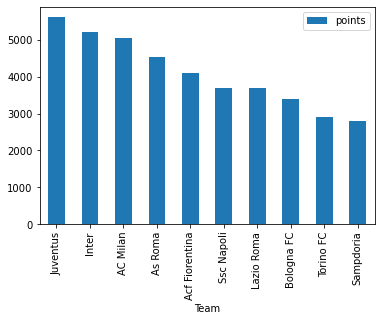

In [10]:
aggregate.sort_values(by='points', ascending = False).head(10).plot.bar(x='Team')

Text(3, 5, 'Property of Dr. Sachin Subedi')

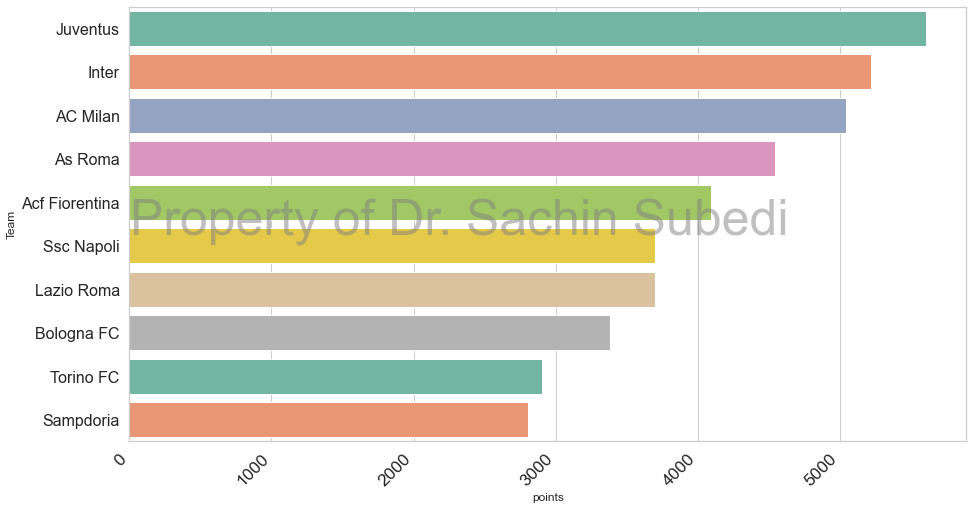

In [11]:
top = aggregate.sort_values(by='points', ascending = False).head(10)

sns.set(style="whitegrid")

plt.figure(figsize=(15,8))

sns.barplot(data = top, x = 'points', y = 'Team', palette='Set2')

plt.xticks(

    rotation=45,

    horizontalalignment='right',

    fontweight='light',

    fontsize='x-large' 

)

plt.yticks(

    fontweight='light',

    fontsize='16' 

)

plt.text(3, 5, 'Property of Dr. Sachin Subedi',

         fontsize=50, color='gray',

       va='bottom', alpha=0.5)

In [12]:
data[['home','away']].stack().value_counts().rename_axis('Team').reset_index(name='counts')

,Team,counts
0,Inter,2961
1,Juventus,2922
2,As Roma,2916
3,AC Milan,2900
4,Acf Fiorentina,2740
...,...,...
64,FC Treviso,38
65,Carpi FC 1909,38
66,Benevento Calcio,38
67,Ac Pistoiese,30
